In [1]:
import os
os.chdir('../../..')

In [2]:
import convokit

/home/caleb/miniconda/envs/venv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
from convokit import Corpus, download
from convokit import HyperConvo
import numpy as np
import pickle

In [4]:
os.chdir('convokit/tensors')

In [5]:
import utils

In [6]:
os.listdir()

['__init__.py', 'data', 'demo', 'utils.py', '__pycache__']

In [7]:
with open('data/hypergraph_tensor.p', 'rb') as f:
    tensor = pickle.load(f)

In [9]:
with open('data/rank_to_factors.p', 'rb') as f:
    rank_to_factors = pickle.load(f)

In [11]:
tensor.shape

(9, 10000, 164)

In [13]:
factors = rank_to_factors[9]

In [14]:
factors[0].shape

(9, 9)

In [15]:
factors[1].shape

(10000, 9)

In [16]:
factors[2].shape

(164, 9)

In [25]:
with open('data/subreddits.p', 'rb') as f:
    subreddits = pickle.load(f)

In [27]:
from sklearn.preprocessing import Imputer, Normalizer, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances

In [28]:
import pandas as pd

In [29]:
df = pd.DataFrame(factors[1])

In [33]:
df['subreddits'] = subreddits

In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,subreddits
0,-0.013772,0.003241,-0.015205,0.065553,0.010375,0.042088,0.031801,0.131640,0.054607,gonewild
1,-0.004544,-0.004381,-0.011795,0.072996,0.001136,-0.000688,0.032778,-0.003328,-0.058250,Libertarian
2,-0.007788,-0.004371,-0.009202,0.079282,0.023167,0.011868,0.014900,0.008738,-0.134157,Fitness
3,-0.006959,-0.001039,-0.013041,0.067433,-0.000822,0.026563,0.021917,0.032673,-0.189290,fantasyfootball
4,-0.003525,-0.004113,-0.011653,0.070978,0.008793,0.011465,0.024268,0.036141,-0.032890,Android


In [37]:
subreddit_means = df.groupby('subreddits').mean()
subreddit_df = pd.DataFrame(
        data=Normalizer().fit_transform(subreddit_means.values),
        index = subreddit_means.index
    )

In [39]:
tsne = TSNE(random_state=2018)
tsne_df = pd.DataFrame(data=tsne.fit_transform(subreddit_df.values),
                      index=subreddit_df.index)

In [41]:
import matplotlib.pyplot as plt

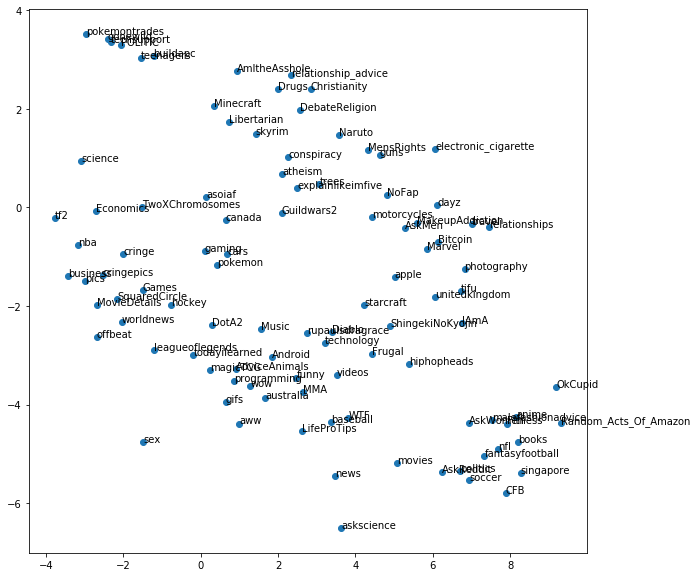

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_df[0].values, tsne_df[1].values)
for i, txt in enumerate(tsne_df.index):
    plt.annotate(txt, (tsne_df.values[i,0], tsne_df.values[i,1]))
plt.show()

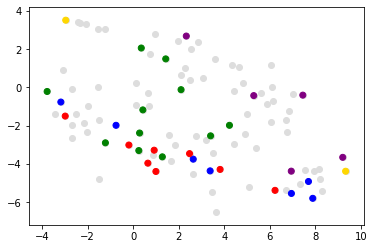

In [43]:
games = ["battlefield3", "Diablo", "DotA2", "Guildwars2", "leagueoflegends", "magicTCG", "Minecraft", "pokemon", "skyrim", "starcraft", "tf2", "wow"]
trade = ["Dota2Trade", "pokemontrades", "SteamGameSwap", "tf2trade", "Random_Acts_Of_Amazon"]
sports = ["baseball", "CFB", "hockey", "MMA", "nba", "nfl", "soccer"]

link_aggregators = ["AskReddit", "WTF", "pics", "gifs", "aww", "funny", "todayilearned",
                   "AdviceAnimals"]
relationships = ["AskMen", "AskWomen", "relationships", "relationship_advice", "OkCupid"]

plt.scatter(tsne_df[0].values, tsne_df[1].values, color="#dddddd")
plt.scatter(tsne_df[0].values, tsne_df[1].values, color=[
    "green" if l in games else
    "gold" if l in trade else
    "purple" if l in relationships else
    "red" if l in link_aggregators else
    "blue" if l in sports else
    "#00000000"
    for l in tsne_df.index])
plt.show()